In [1]:
import torch 

In [2]:
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
from fastai.vision.all import *
from time import sleep


In [3]:
import timm

In [4]:
def search_images(term, max_images = 30 ):
    print(f'Searching for {term}')
    return L(ddg_images(term, max_results= max_images)).itemgot('image')


In [13]:
urls = search_images('birds',max_images=1)
urls[0]

Searching for birds


'https://mileshearn.com/wp-content/uploads/2020/11/spto_01-11-12-04-web-2048x1365.jpg'

In [14]:
dest= 'bird.jpg'
download_url(urls[0],dest=dest)

Path('bird.jpg')

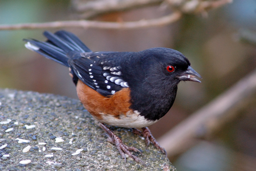

In [8]:
im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
searchs = 'forest','bird'
path = Path('bird_or_not')


In [16]:

for o in searchs:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest = dest , urls= search_images(f'{o} photo'))
    sleep(10)
    download_images(dest = dest , urls= search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest = dest , urls= search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size= 400, dest= path/o)

Searching for forest photo
Searching for forest sun photo


KeyboardInterrupt: 

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

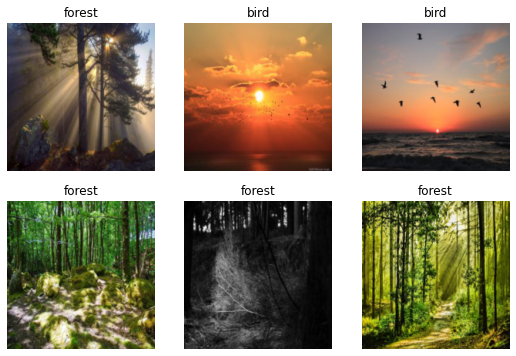

In [8]:
dls = DataBlock(blocks=[ImageBlock, CategoryBlock], 
               get_items=get_image_files,
               splitter= RandomSplitter(seed= 42),
                get_y=parent_label, item_tfms= [Resize(192,method='squish')]
               ).dataloaders(path,bs=32)
dls.show_batch(max_n= 6)

In [19]:
learn = vision_learner(dls, resnet18, metrics= error_rate)

/home/ikram/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ikram/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ikram/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [20]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.970922,0.425564,0.146341,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.155041,0.341413,0.073171,00:37
1,0.090459,0.395349,0.048780,00:37
2,0.065903,0.266848,0.048780,00:45


In [39]:
download_url(search_images('forest ')[0],'forest_bird.jpg',show_progress=False)

Searching for forest 


Path('forest_bird.jpg')

In [42]:
is_bird, _, probs = learn.predict(PILImage.create('birdss.jpg'))
print(f'this is a {is_bird}')
print(f'prob it is a bird :{probs[0]:.4f}')

this is a bird
prob it is a bird :0.9996
